# import & load data

In [1]:
%run imports_N_loadData.ipynb

load&process Synthetic data===========================
len(ground_truth_synthetic): 45
---load data from 'txt' or 'xlsx' files...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(pressure_df_synthetic) 3519
len(rate_df_synthetic) 95
load & denoise real field data===========================
---load data from 'txt' or 'xlsx' files...
check the time type
---denoising data using S-G smoothing...
---The first & second order derivative has been calculated and appended to pressure dataframe
len(pressure_measure_denoised) 29813
len(ground_truth_denoised) 60
after remove uncorrect ground truth
len(ground_truth_denoised) 54


# pipeline tangent & pattern recognition

## tangent

In [2]:
identify_useTangent=TangentMethod(time_halfWindow=0.5,polynomial_order=1)
identify_useTangent.learn_TangentRange(pressure_measure_denoised,pressure_time_denoised,ground_truth_denoised)
print("learned tangent range:",identify_useTangent.tangents_twoPatterns)
points=[index for index in range(len(pressure_measure_denoised))]
buildup1,drawdown1=identify_useTangent.predict_usingTangentRange(pressure_measure_denoised,pressure_time_denoised,points)
print("len(buildup1),len(drawdown1)",len(buildup1),len(drawdown1))

start to learn..., using polynomial curve fitting
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
learned tangent range: {'buildUp': {'left_top': 56.80313901569443, 'left_bottom': -34.82711344594688, 'right_top': 516.1051748306456, 'right_bottom': 11.850691692072408}, 'drawDown': {'left_top': -0.618698533963039, 'left_bottom': -19.93754102101771, 'right_top': -40.56354367407886, 'right_bottom': -635.1659781700631}}
start to predict using tangent...
-------calculate_Parameters_allCurve using 'polynomial' fitting
before filter, the length of buildup 6819, the length of drawdown 263
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
len(buildup1),len(drawdown1) 4030 263


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [3]:
identify_useTangent=TangentMethod(time_halfWindow=0.5)
identify_useTangent.learn_TangentRange(pressure_measure_denoised,pressure_time_denoised,ground_truth_denoised)
print("learned tangent range:",identify_useTangent.tangents_twoPatterns)
points=[index for index in range(len(pressure_measure_denoised))]
buildup2,drawdown2=identify_useTangent.predict_usingTangentRange(pressure_measure_denoised,pressure_time_denoised,points)
print("len(buildup2),len(drawdown2)",len(buildup2),len(drawdown2))

start to learn..., using polynomial curve fitting
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
learned tangent range: {'buildUp': {'left_top': 45.27497854899796, 'left_bottom': -152.63091555498391, 'right_top': 647.2674117628343, 'right_bottom': -36.62713699390792}, 'drawDown': {'left_top': 1.127549546055203, 'left_bottom': -48.789908412659805, 'right_top': 108.17531290040623, 'right_bottom': -881.6642146197155}}
start to predict using tangent...
-------calculate_Parameters_allCurve using 'polynomial' fitting
before filter, the length of buildup 16522, the length of drawdown 7621
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
len(buildup2),len(drawdown2) 5189 3543


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

start to learn..., using polynomial curve fitting
start to learn..., using polynomial curve fitting
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
------In the input ground truth: 25 points are detected as buildup, 28 points are detected as drawDown
-------calculate_Parameters_allCurve using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
start to get pattern..., using '{fitting_type}' fitting
-----start to calculate'buildUp' pattern parameter, there are 25 for calculation
-----start to calculate'drawDown' pattern parameter, there are 28 for calculation
start to predict using pattern...
before filter, the length of buildup 1030, the length of drawdown 101
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
after filter, the results are filtered further, there are 989 detected buildup points, 101 drawdown detected
************************************
result after second dete

<Figure size 1440x720 with 0 Axes>

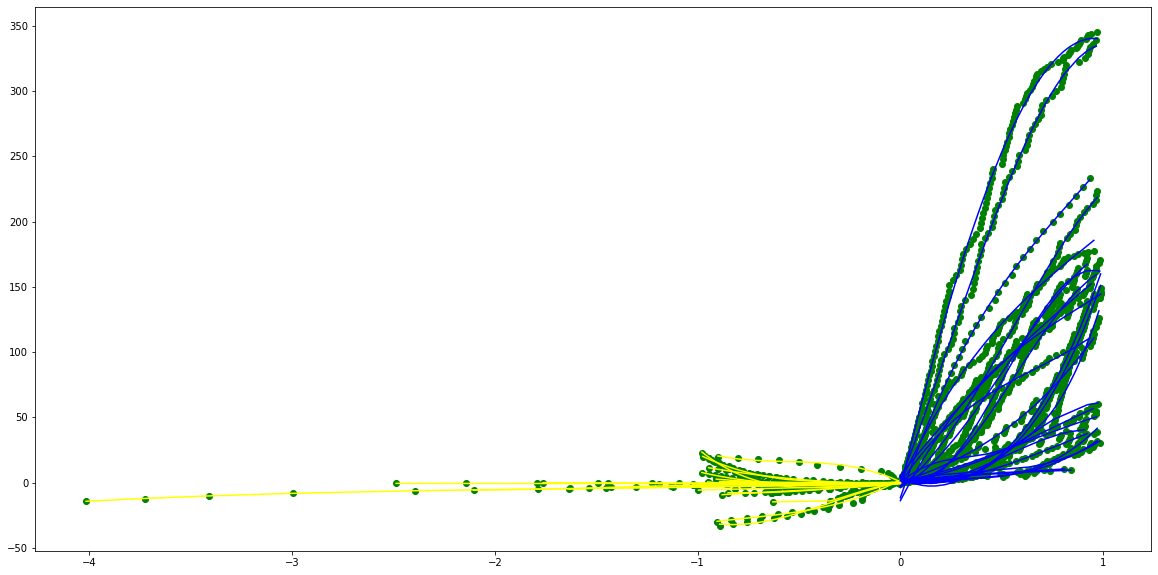

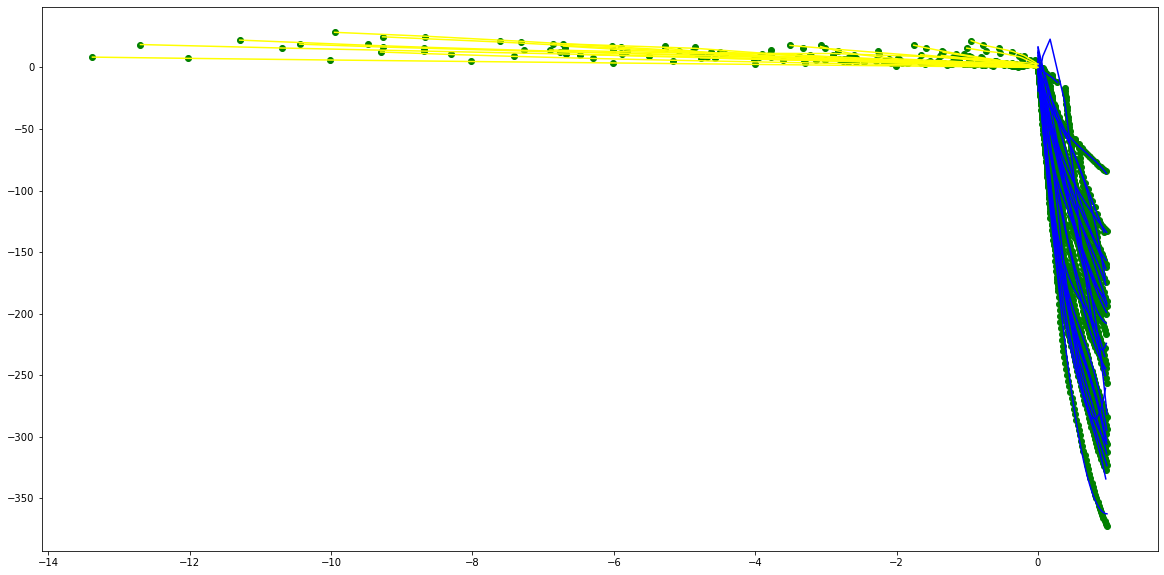

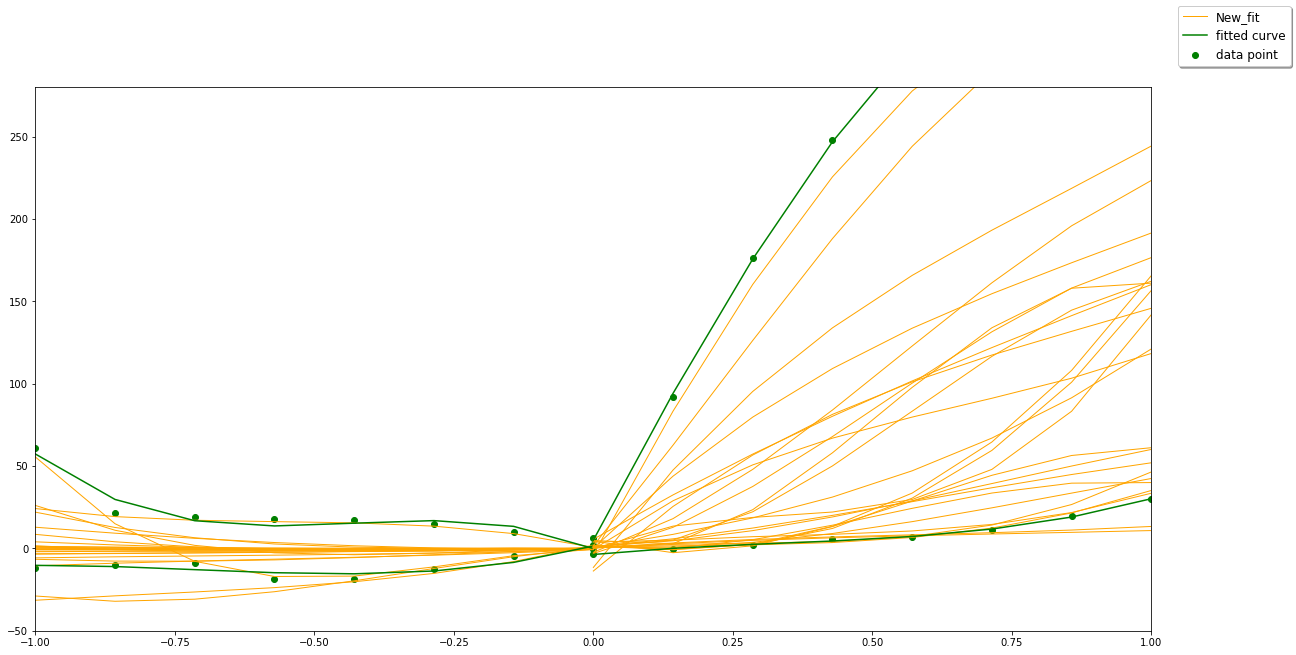

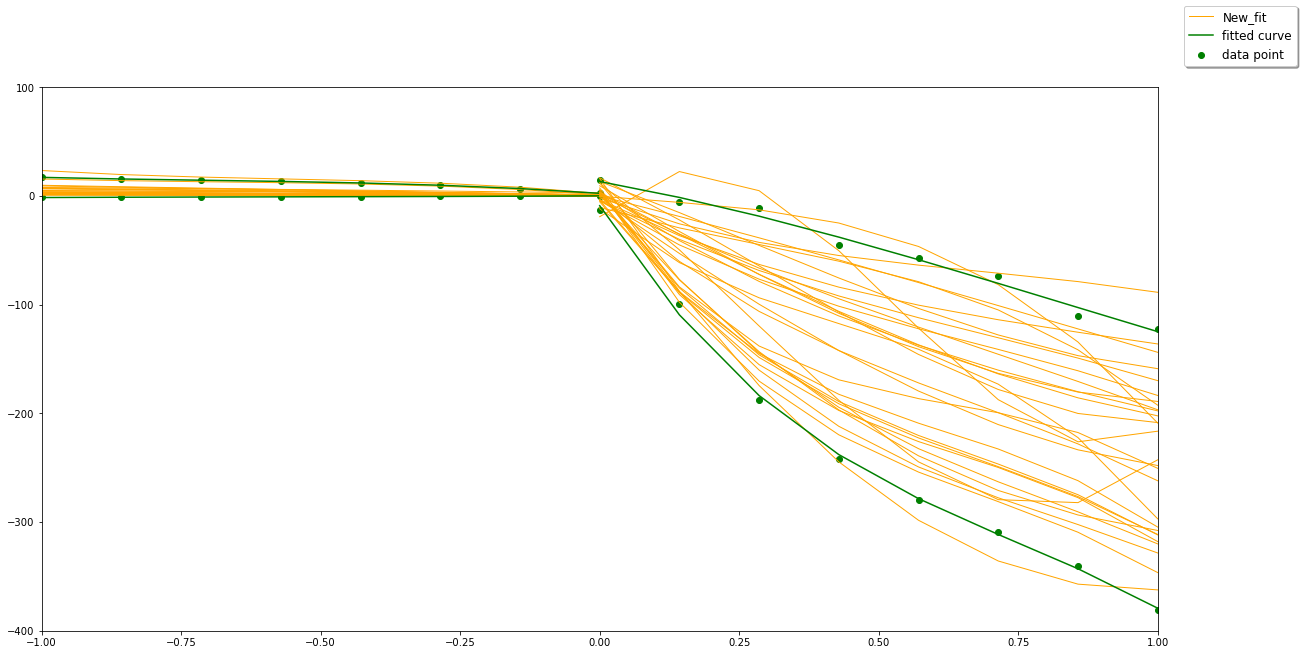

<Figure size 1440x720 with 0 Axes>

In [4]:
#detect
percentile_tuning={
                                    "buildUp":{"left":[100,10],
                                              "right":[100,10]},
                                   "drawDown":{"left":[95,6],
                                              "right":[95,3]}
                                   }


fine_tuning={"buildUp":{"left_top":1.1,
                    "left_bottom":1.1,
                    "right_top":1.1,
                    "right_bottom":0.9},
            "drawDown":{"left_top":1.1,
                        "left_bottom":-1.1,
                        "right_top":0.9,
                        "right_bottom":1.1}}

point_halfWindow=8
identfication_UsePattern=PatternRecognitionMethod(time_halfWindow_forPredict=1,time_halfWindow_forLearn=1,percentile_tuning=percentile_tuning,fine_tuning=fine_tuning)


fitting_type="polynomial"
identfication_UsePattern.learn(pressure_measure_denoised,pressure_time_denoised,ground_truth_denoised,fitting_type=fitting_type)
points=buildup1+drawdown1
buildup3,drawdown3=identfication_UsePattern.predict(pressure_measure_denoised,pressure_time_denoised,points,fitting_type=fitting_type)
print("************************************")
print(f"result after second detection: buildUp,{len(buildup3)}, drawDown {len(drawdown3)}")

start to learn..., using polynomial curve fitting
start to learn..., using polynomial curve fitting
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
------In the input ground truth: 25 points are detected as buildup, 28 points are detected as drawDown
-------calculate_Parameters_allCurve using 'polynomial' fitting
-------calculate_Parameters_allCurve using 'polynomial' fitting
start to get pattern..., using '{fitting_type}' fitting
-----start to calculate'buildUp' pattern parameter, there are 25 for calculation
-----start to calculate'drawDown' pattern parameter, there are 28 for calculation
start to predict using pattern...
before filter, the length of buildup 1098, the length of drawdown 414
detect breakpoint type.....
-------calculate_Parameters_allCurve using 'linear' fitting
after filter, the results are filtered further, there are 1100 detected buildup points, 352 drawdown detected
************************************
result after second det

<Figure size 1440x720 with 0 Axes>

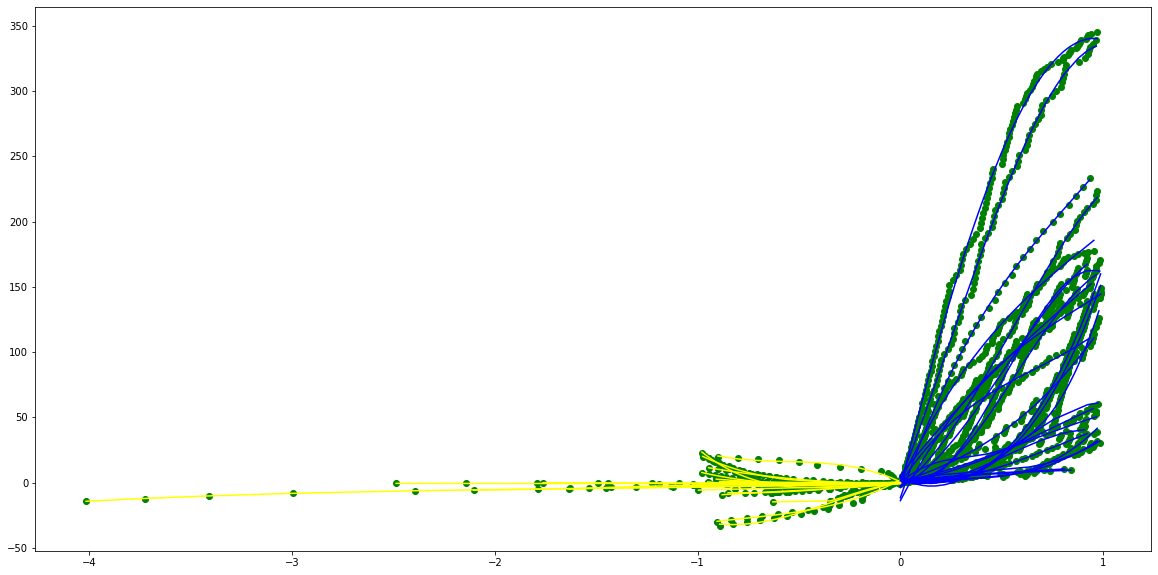

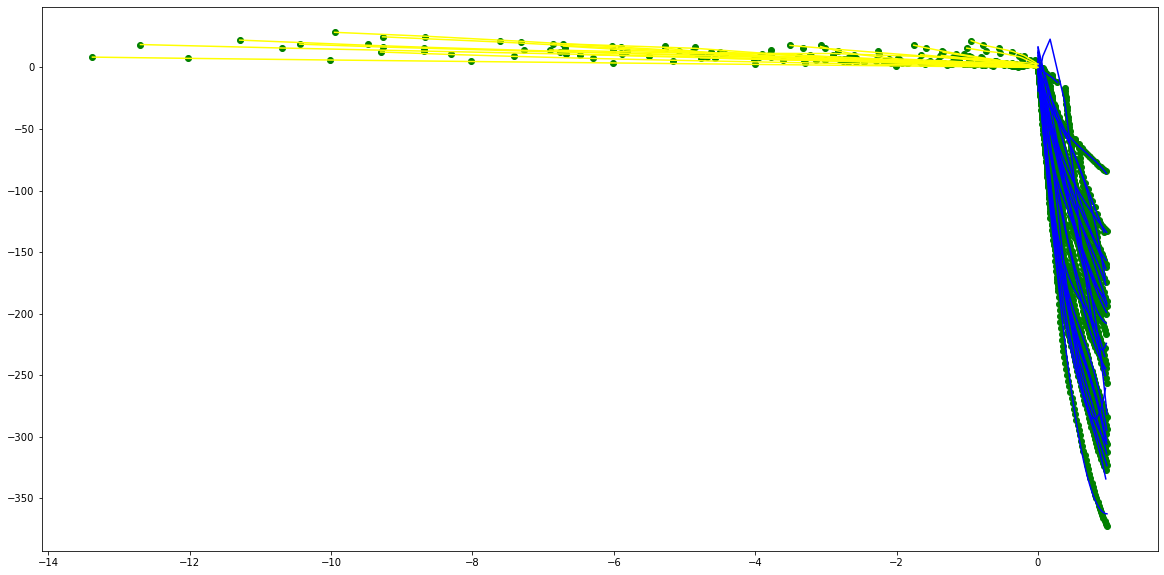

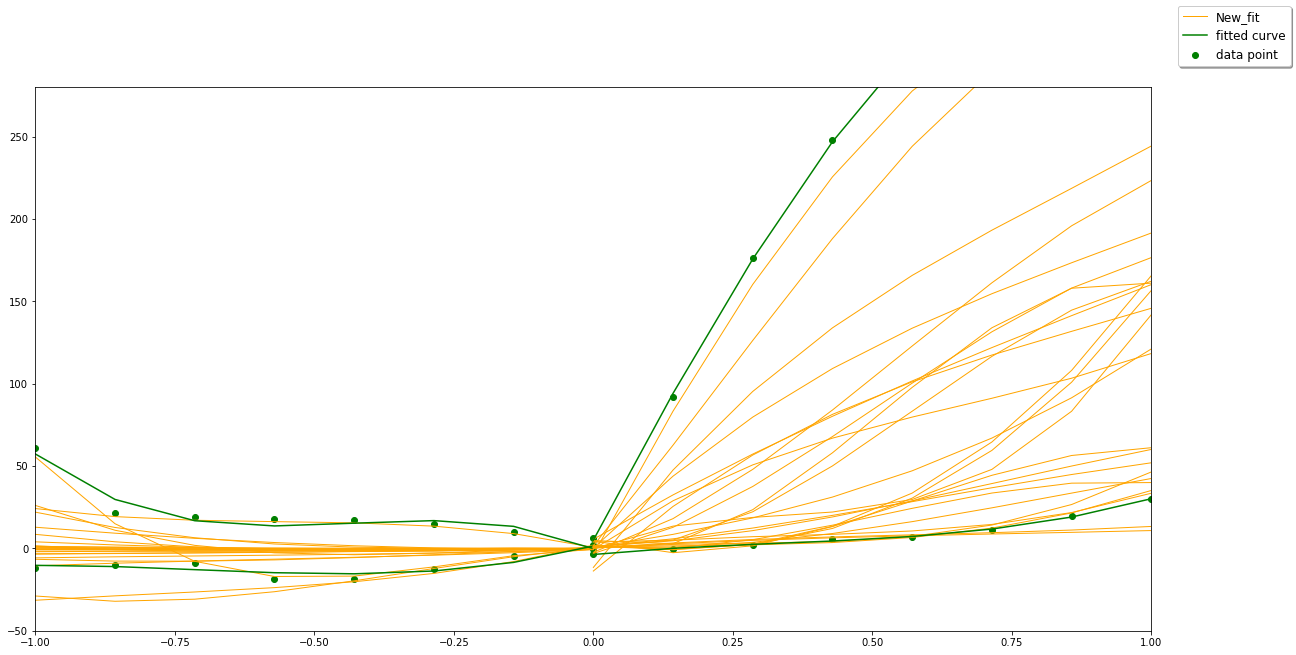

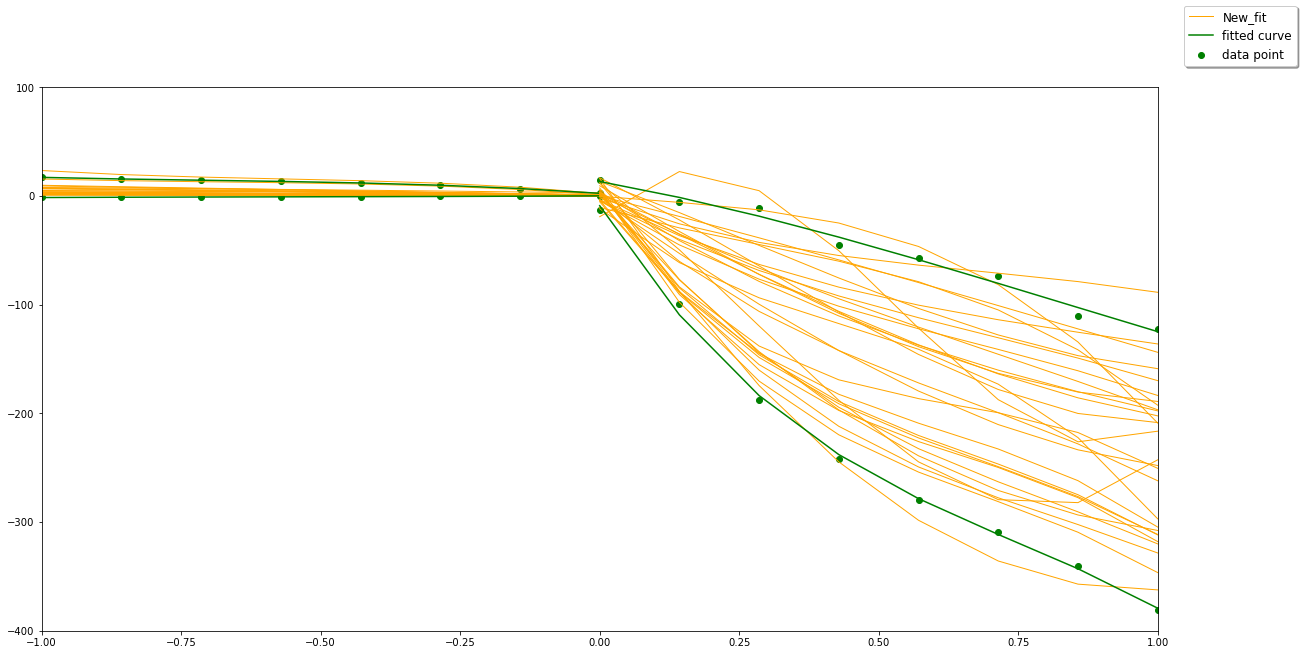

<Figure size 1440x720 with 0 Axes>

In [6]:
point_halfWindow=8
identfication_UsePattern=PatternRecognitionMethod(time_halfWindow_forPredict=1,time_halfWindow_forLearn=1,percentile_tuning=percentile_tuning,fine_tuning=fine_tuning)


fitting_type="polynomial"
identfication_UsePattern.learn(pressure_measure_denoised,pressure_time_denoised,ground_truth_denoised,fitting_type=fitting_type)
points=buildup2+drawdown2
buildup4,drawdown4=identfication_UsePattern.predict(pressure_measure_denoised,pressure_time_denoised,points,fitting_type=fitting_type)
print("************************************")
print(f"result after second detection: buildUp,{len(buildup4)}, drawDown {len(drawdown4)}")

## plot & save

---initializing...
---plotting...


findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.


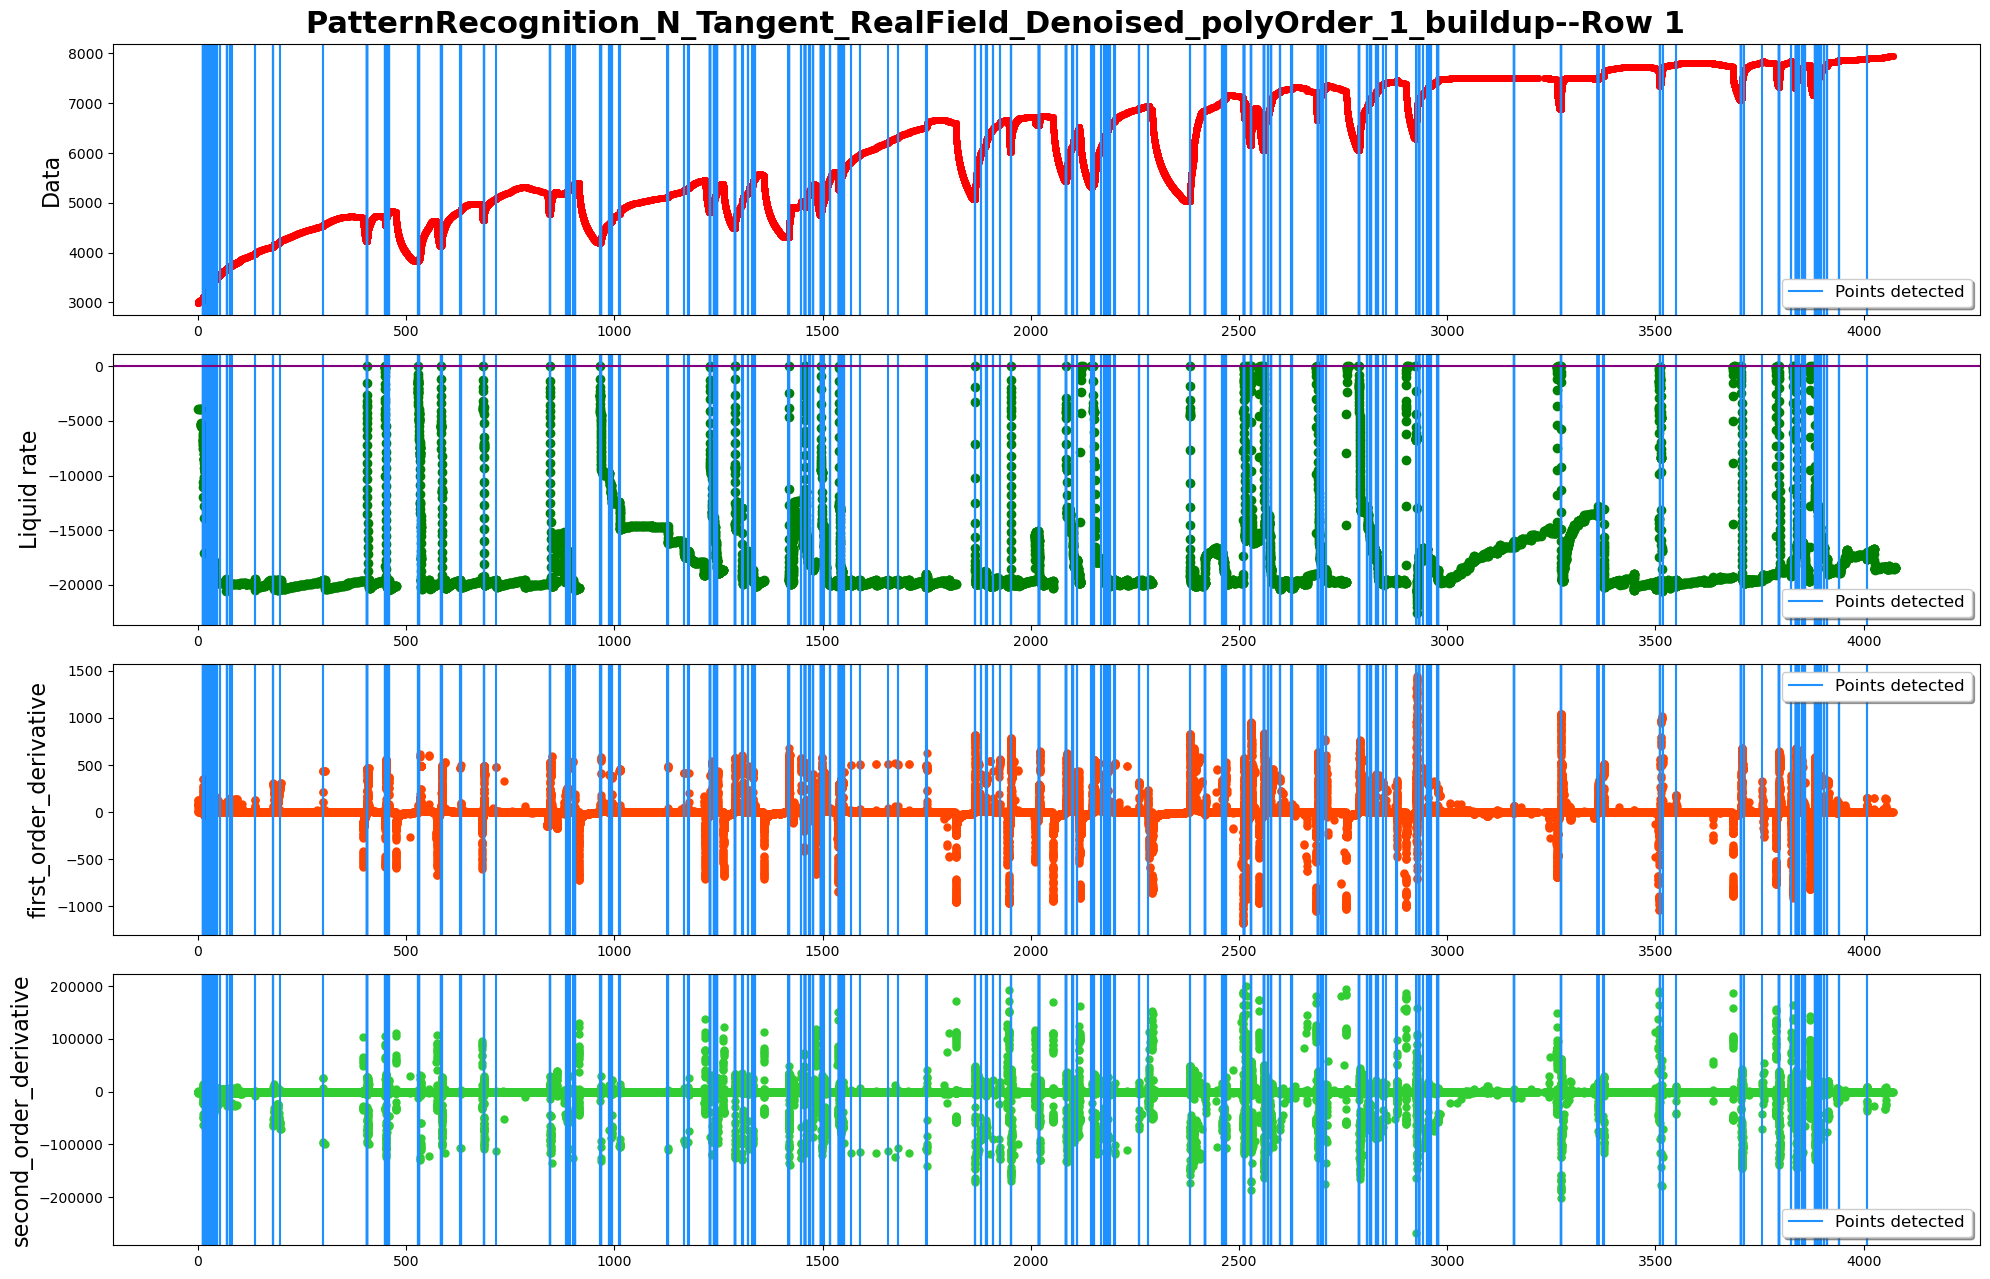

save whole....
detected 989 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[32, 33, 34, 38, 39, 40, 41, 42, 43, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 301, 302, 366, 367, 368, 369, 370, 371, 374, 399, 400, 401, 402, 403, 415, 416, 417, 428, 429, 430, 431, 432, 433, 434, 471, 508, 509, 510, 511, 594, 595, 596, 597, 598, 599, 600, 601, 603, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 700, 701, 852, 853, 854, 855, 874, 875, 876, 1031, 1032]
------row 2-----detected points:[1354, 1356, 1357, 1358, 1359, 1360, 1438, 1439, 1440, 1488, 1730, 1731, 1811, 1812, 1813, 1814, 1946, 2111, 2112]
------row 3-----detected points:[2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2484, 2485, 2486, 2487, 2488, 2492, 28

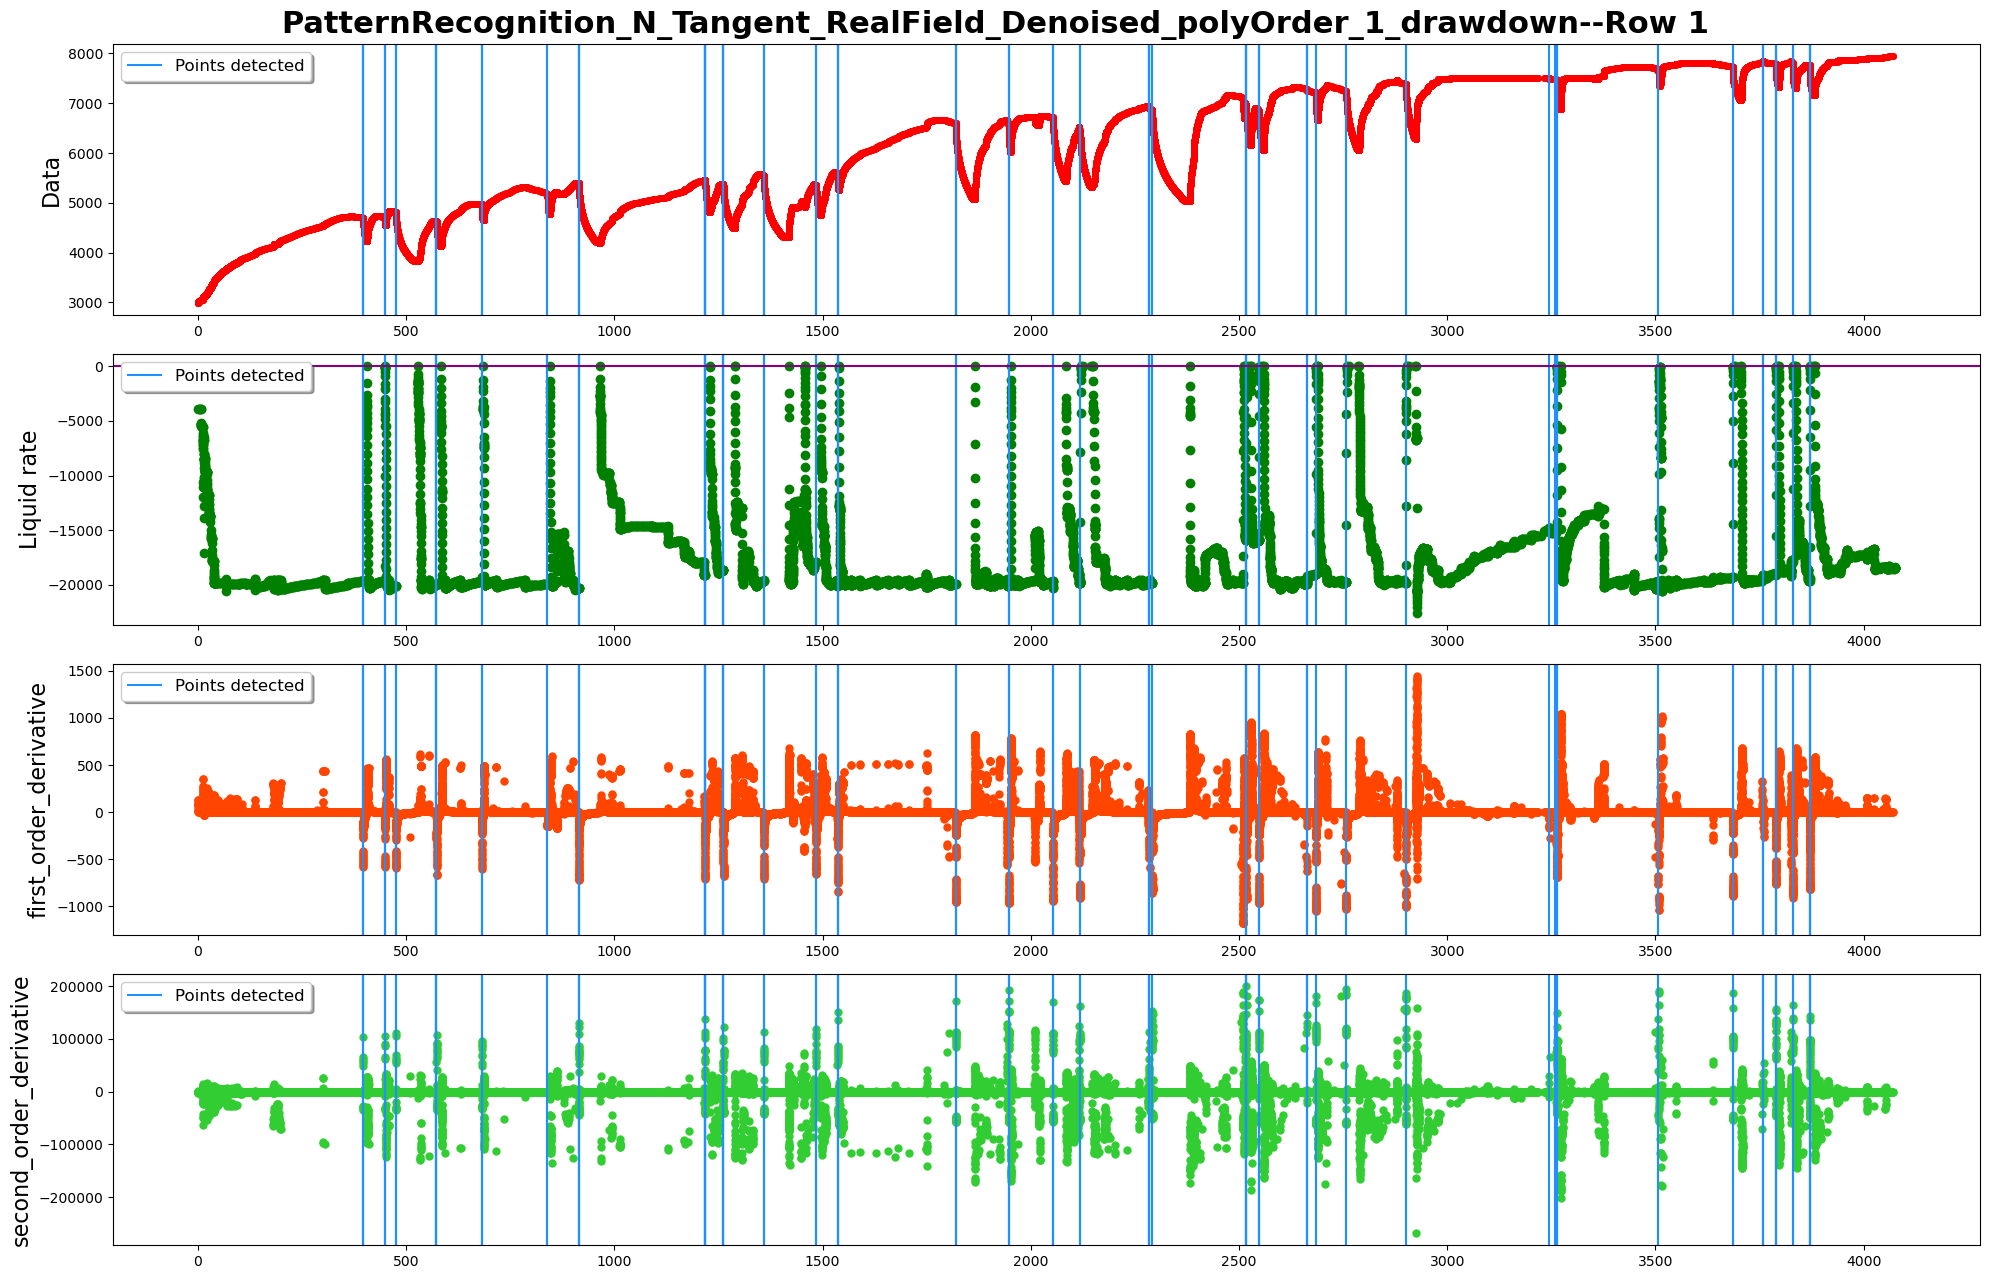

save whole....
detected 101 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]
------row 2-----detected points:[2248, 2249, 2250]
------row 3-----detected points:[2804, 2805, 2806, 3095, 3096, 3097]
------row 4-----detected points:[3987, 3988, 3989, 3990, 3991, 4750, 4751, 4752]
------row 5-----detected points:[5297, 5298, 5983, 5984, 5985, 5986]
------row 6-----detected points:[]
------row 7-----detected points:[7246, 7247, 7248, 7249, 7250, 7251, 7945, 7946, 7947, 7948, 7949]
------row 8-----detected points:[9023, 9024, 9025]
------row 9-----detected points:[10526, 10527, 10528]
------row 10-----detected points:[11339, 11340, 11341, 11342]
------row 11-----detected points:[12361, 12362, 12363]
------row 12-----detected points:[13866, 13867, 13868]
------row 13-----detected points:[14766, 14767, 14768]
------row 14-----detected points:[16093, 16094, 16095]
------row 15-----detected points:[17550, 17551, 17552, 17553, 17589, 17590]
------row 16---

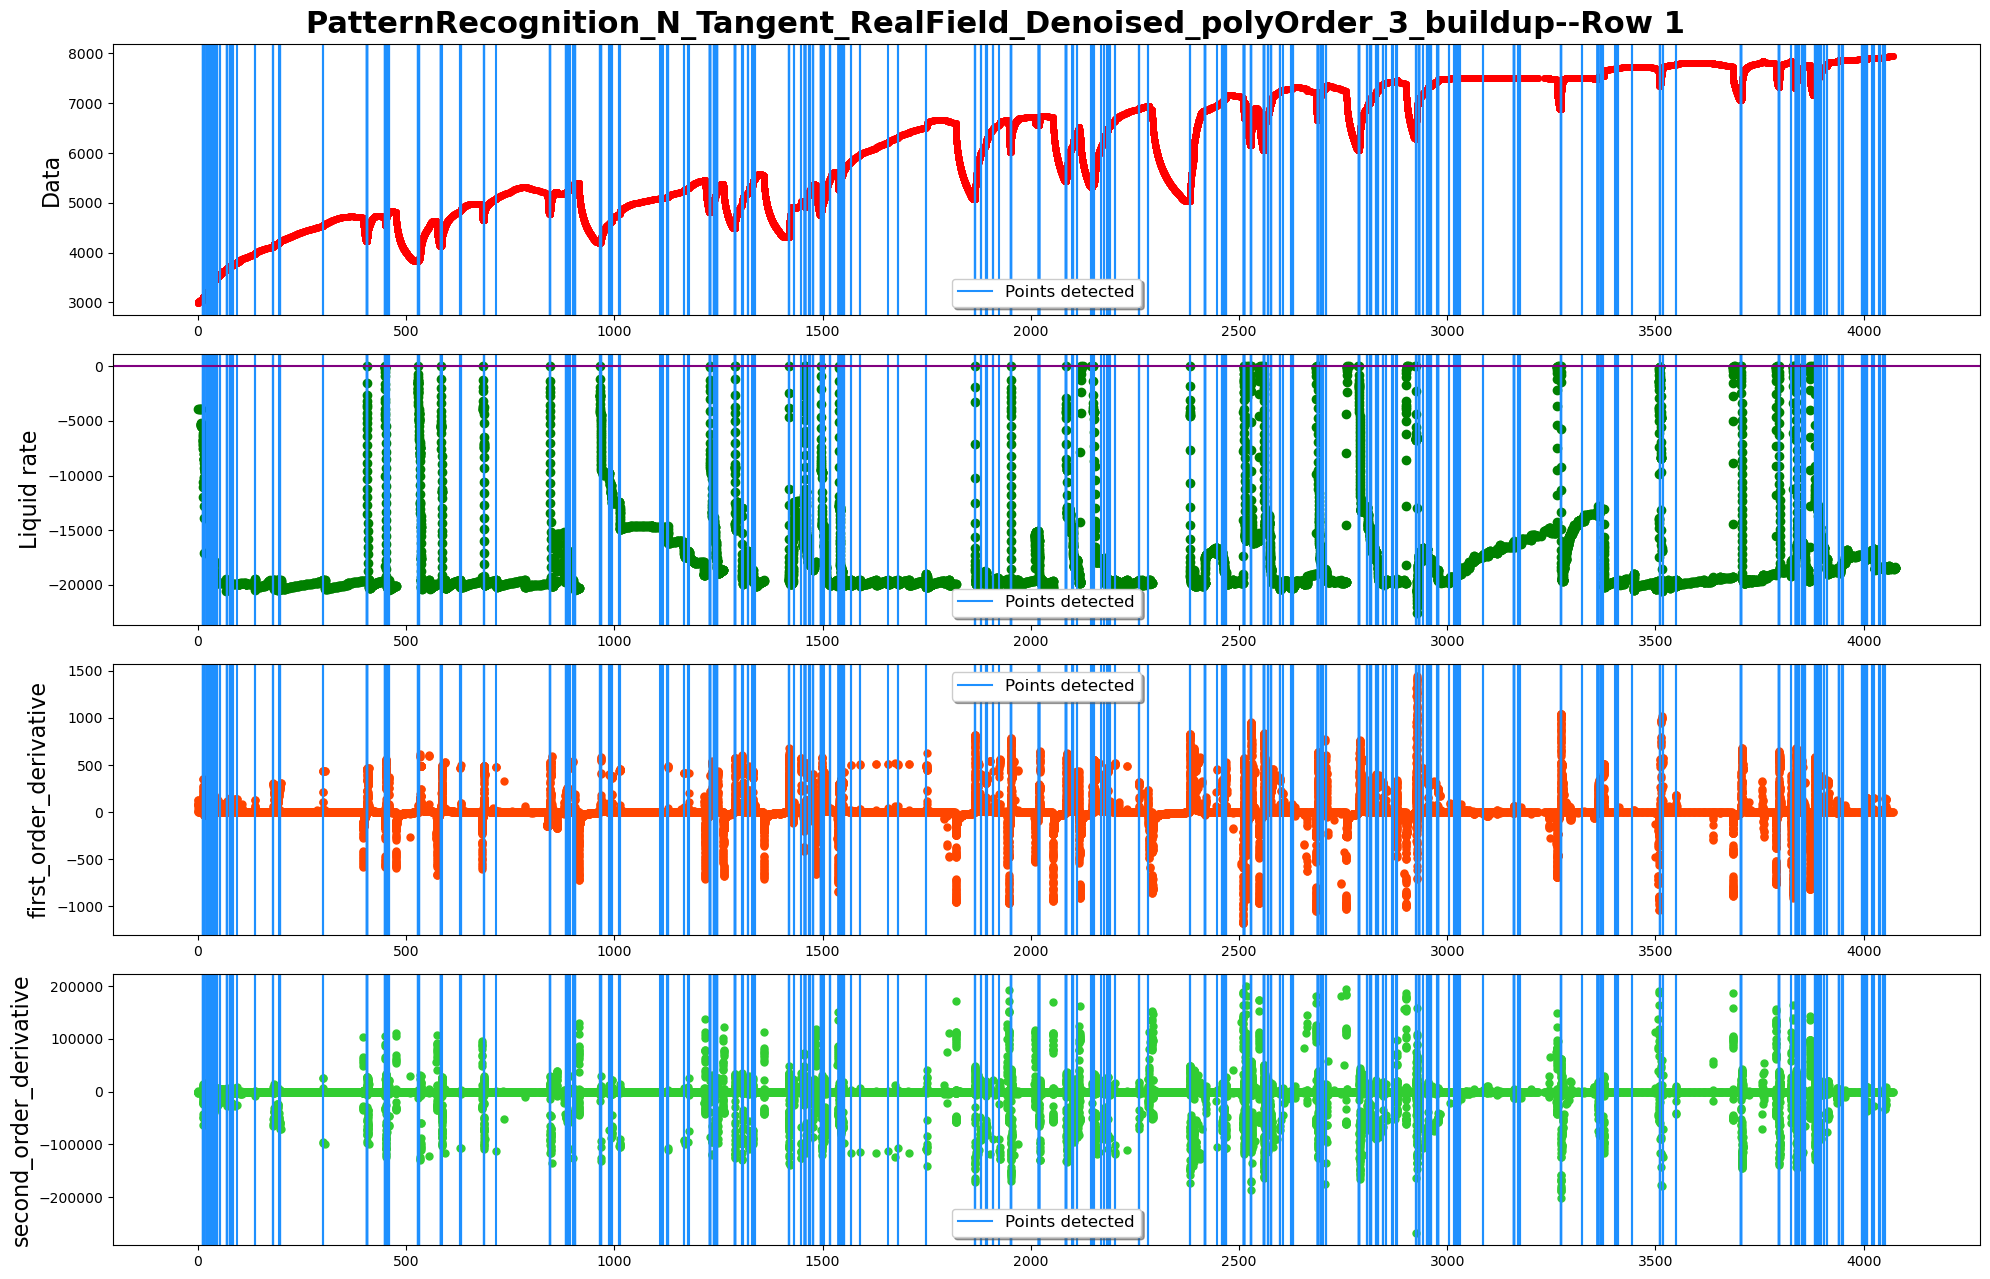

save whole....
detected 1100 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[32, 33, 34, 38, 39, 41, 42, 43, 243, 243, 244, 244, 245, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 366, 367, 368, 369, 370, 371, 374, 374, 399, 400, 401, 402, 403, 415, 415, 416, 417, 428, 429, 430, 431, 434, 508, 508, 509, 510, 511, 594, 594, 595, 596, 597, 598, 599, 600, 601, 603, 683, 684, 685, 686, 687, 687, 688, 688, 689, 690, 691, 692, 693, 694, 695, 759, 760, 760, 842, 846, 852, 852, 853, 854, 855, 874, 875, 876, 894, 895, 1031, 1032]
------row 2-----detected points:[1354, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1438, 1439, 1440, 1488, 1488, 1489, 1514, 1515, 1589, 1730, 1731, 1811, 1812, 1813, 1814, 1905, 1936, 1936, 1946, 1946, 2111, 2112]
------row 3-----detected points:[2475, 2476, 2477, 2478, 2479

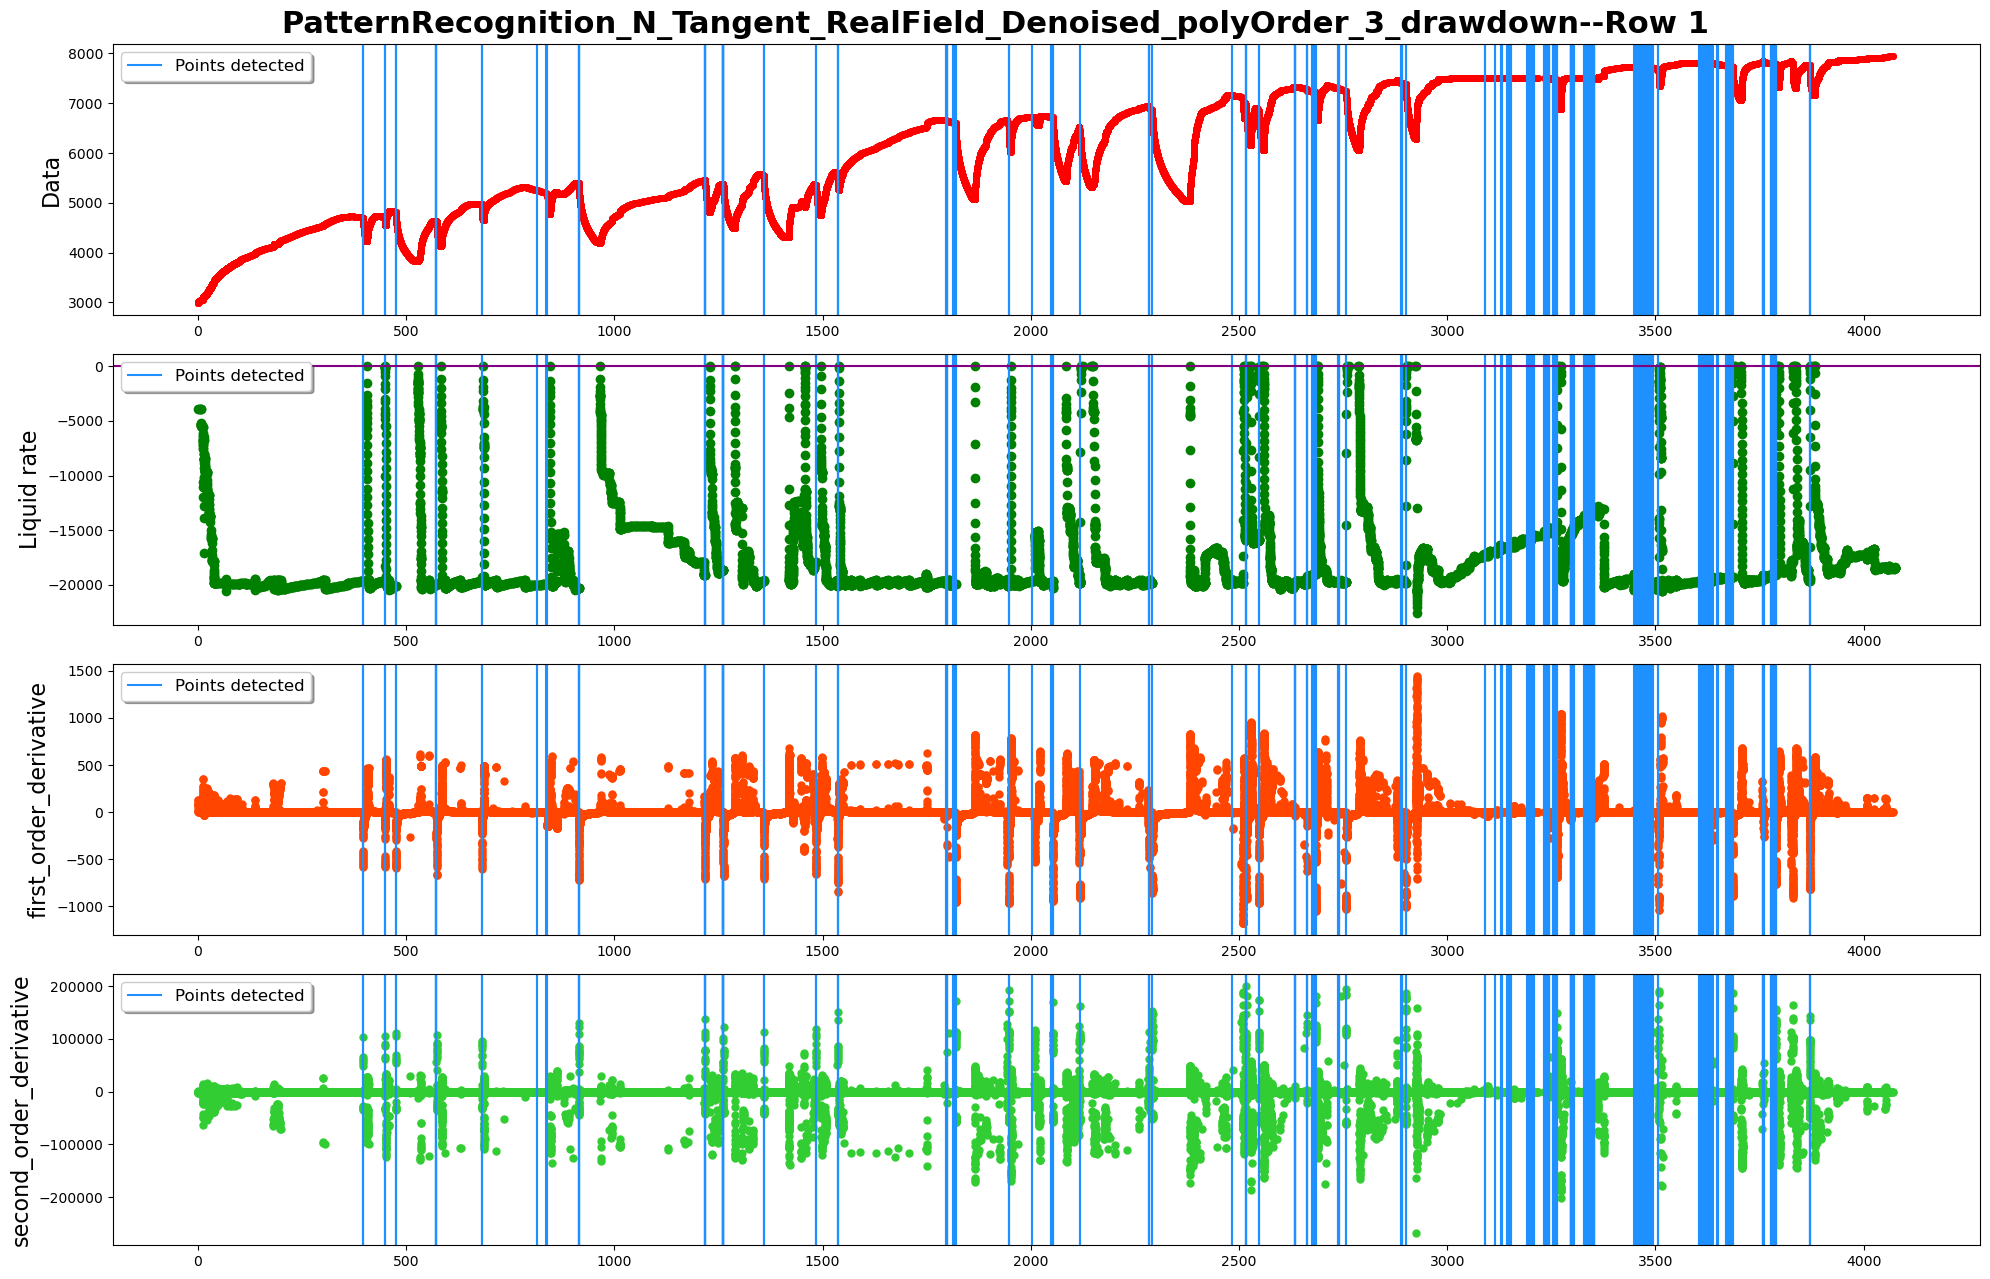

save whole....
detected 352 points as breakpoints
The plot is devided into 25 rows
------row 1-----detected points:[]
------row 2-----detected points:[2248, 2249, 2250]
------row 3-----detected points:[2804, 2805, 2806, 3095, 3096, 3097]
------row 4-----detected points:[3987, 3987, 3988, 3989, 3990, 3991, 4750, 4751, 4752]
------row 5-----detected points:[5280, 5280, 5295, 5297, 5298, 5983, 5983, 5984, 5984, 5985, 5986]
------row 6-----detected points:[]
------row 7-----detected points:[7246, 7247, 7248, 7249, 7250, 7251, 7945, 7945, 7946, 7946, 7947, 7947, 7948, 7948, 7949, 7949]
------row 8-----detected points:[9023, 9024, 9025]
------row 9-----detected points:[10526, 10527, 10528]
------row 10-----detected points:[11339, 11340, 11341, 11342]
------row 11-----detected points:[12334, 12334, 12337, 12338, 12338, 12339, 12339, 12358, 12358, 12359, 12359, 12362, 12363]
------row 12-----detected points:[13866, 13867, 13868]
------row 13-----detected points:[14431, 14431, 14763, 14763, 147

In [7]:
#plot & save
pressure_df=pressure_df_denoised
rate_df=rate_df_denoised
colum_names=colum_names_denoised
data_inOneRow=data_inOneRow_denoised
plot_whole=True
plot_details=False
plot_statistics=False
polyorders=[1,3]
points=[[buildup3,drawdown3],[buildup4,drawdown4]]
names=["buildup","drawdown"]
txt=print_tuning_parameters(percentile_tuning,fine_tuning)
for order,breakpoints in zip(polyorders,points):
    for points,name in zip(breakpoints,names):    
        filename_toSave_whole=f"../data_output/PatternRecognition_N_Tangent_RealField_Denoised/polyOrder_{order}_{name}_whole.pdf"
        filename_toSave_details=f"../data_output/PatternRecognition_N_Tangent_RealField_Denoised/polyOrder_{order}_{name}_details.pdf"
        plot_name=f"PatternRecognition_N_Tangent_RealField_Denoised_polyOrder_{order}_{name}"
        PlotNSave(pressure_df,
          rate_df,
          points,
          [],
          data_inOneRow,
          plot_name,
                  txt,
          filename_toSave_whole,
          filename_toSave_details,
          plot_statistics,
          plot_whole,
          plot_details,
          colum_names)
     